In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r"student_info.csv"
df=pd.read_csv(path)
print(df)

     study_hours  student_marks
0           6.83          78.50
1           6.56          76.74
2            NaN          78.68
3           5.67          71.82
4           8.67          84.19
..           ...            ...
195         7.53          81.67
196         8.56          84.68
197         8.94          86.75
198         6.60          78.05
199         8.35          83.50

[200 rows x 2 columns]


In [3]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [5]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017C0C9C23C8>,
      dtype=object)

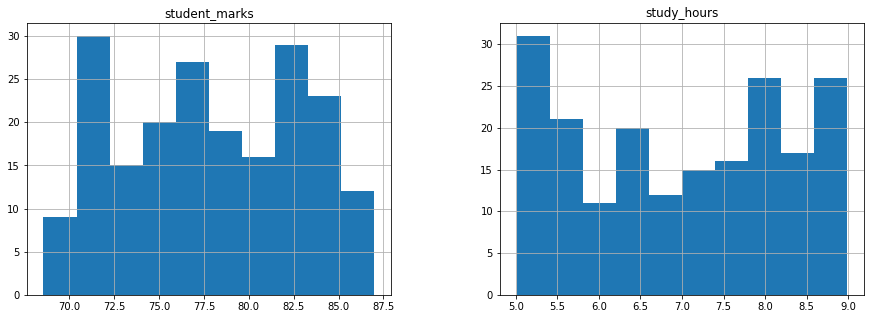

In [6]:
df.hist(bins=10,figsize=(15,5))

# using imputer to fill null values

In [7]:

from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="mean")
imputer.fit(df)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [8]:
X=imputer.transform(df)
df2=pd.DataFrame(X,columns=df.columns)

In [9]:
df2.describe()

,study_hours,student_marks
count,200.000000,200.00000
mean,6.995949,77.93375
std,1.237218,4.92570
min,5.010000,68.57000
25%,5.790000,73.38500
50%,7.002974,77.71000
75%,8.072500,82.32000
max,8.990000,86.99000


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    200 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


# splitting in dependent y and independent x variables...and then further x and y both will  split in test ans train set

In [11]:
x=df2.drop("student_marks",axis="columns")
y=df2.drop("study_hours",axis="columns")

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("shapeof xtrain",x_train.shape)
print("shapeof xtest",x_test.shape)
print("shapeof ytrain",y_train.shape)
print("shapeof ytrain",y_test.shape)

shapeof xtrain (160, 1)
shapeof xtest (40, 1)
shapeof ytrain (160, 1)
shapeof ytrain (40, 1)


# select model

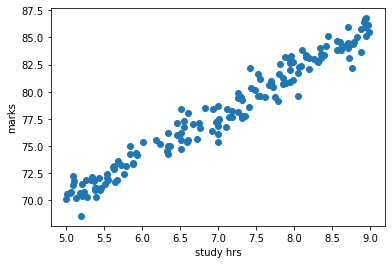

In [13]:
plt.scatter(x=x_train,y=y_train)
plt.xlabel("study hrs")
plt.ylabel("marks")
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()

In [15]:
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# linearregression formula y=mx+c
#intercept=value of m
lreg.intercept_

array([50.4383507])

In [17]:
#coefficient=value of c
lreg.coef_

array([[3.92640681]])

In [18]:
#prediction y by giving x value here lreg is trained model
lreg.predict([[4]])[0][0]

66.14397795461718

In [19]:
ypred=lreg.predict(x_test)

In [20]:
# checking accuracy score
lreg.score(x_test,y_test)

0.942580760104548

In [21]:
pd.DataFrame(np.c_[x_test,y_test,ypred],columns=["styhrs","marks","mrks"])

,styhrs,marks,mrks
0,6.09,76.48,74.350168
1,6.55,76.03,76.156315
2,8.13,82.27,82.360038
3,7.53,81.57,80.004194
4,6.38,77.01,75.488826
5,5.79,74.44,73.172246
6,8.25,82.79,82.831207
7,5.19,71.18,70.816402
8,5.39,73.02,71.601683
9,6.18,72.96,74.703545


In [22]:
#error finding

#from sklearn.metrics import mean_squared_error
#y_pred=lreg.predict(x_test)
#msee=mean_squared_error(y_test,y_pred)
#rmsee=np.sqrt()

In [23]:
# save model

import joblib
joblib.dump(lreg,"student_marks_predictor.pkl")

['student_marks_predictor.pkl']

In [24]:
model=joblib.load("student_marks_predictor.pkl")
model.predict([[5]])[0][0]

70.07038476812899

In [25]:
model.predict([[6]])[0][0]

73.99679158164079